<h1>Grading Scheme</h1>

Any sanity check type problem will be worth a 1/2 point.

Any single step exercise will be worth 1 point.

Any complex exercise requiring multiple steps, or subject matter exercise, will be worth 5 points.

<h1>Instructions</h1>

Do your best to make sure that I will be able to run it.

For example, read in the CSV files from the current directory. I.e., do not write the full path of the file in your code. That will allow me to run your notebook in any directory on my own PC.

Please use markdown cells to help me understand what you are doing. (I know it may be obvious, but I want to see that you know how to use markdown.)

Some of the questions may be vague, you can either ask me for clarification, or clearly explain your interpretation to the question and your solution to your interpretation. Remember, an important part of being a data scientist is communication and soft skills, so take this as an opportunity to exercise those skills.

<h1>Imports</h1>

<h2>Import the most common Python packages used in general data science.</h2>

<b>1/2 point</b>

The most common packages are used for efficient matrix and array computations, data analysis, and plotting.

<b>Numpy</b> provides data structures that allow for the essential features used by <i>clean</i> and <i>well-organized</i> data typically seen in numerical computing tasks. 

<b>Pandas</b> is built on top of Numpy, and provides data structures that allow for the essential features used by <i>un-clean</i> and <i>ill-organized</i> data typically seen in statistics and machine learning. Such data is typically less structured, has attached row and column labels, and is typically populated with heterogeneous types and missing data. 

<b>Matplotlib</b> is also built on top of Numpy arrays, and is used for visualization in Python. One of its most important features is the ability to be a <i>multiplatform</i> data visualization library; it can work with many operating systems and graphics backends. 

<b>Sci-Kit Learn</b> is the best known module used for machine learning in Python. It provides efficient versions of a large number of common algorithms. 

In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
import os.path
import time

<h1>Pandas Objects</h1>

<h2>Read in the seven data sets on liquidity providers, swaps, and tokenholders.</h2>

You can find the linked datasets <a href="https://www.covalenthq.com/blog/dandd-uniswap-dataset-announcement/"> here</a>.

<b>1/2 point</b>



I use Google Colab for all of my programming, so the first echelon is for Colab assuming that the releveant files have been uploaded to your Colab workstream. The second echelon of code is for Jupyter. I have also uploaded my work to GitHub here: 

In [390]:
# Colab
burn_mint = pd.read_csv("BurnMint.csv")
dai_eth = pd.read_csv("DAI-ETH.csv")
eth_usdt = pd.read_csv("ETH-USDT.csv")
uni_eth = pd.read_csv("UNI-ETH.csv")
usdc_eth = pd.read_csv("USDC-ETH.csv")
wbtc_eth = pd.read_csv("WBTC-ETH.csv")
swaps = pd.read_csv("Swaps.csv")

In [ ]:
# Jupyter
data_dir = os.getcwd()
burn_mint = pd.read_csv(os.path.join(data_dir, "BurnMint.csv"))
swaps = pd.read_csv(os.path.join(data_dir, "Swaps.csv"))
dai_eth = pd.read_csv(os.path.join(data_dir, "DAI-ETH.csv"))
eth_usdt = pd.read_csv(os.path.join(data_dir, "ETH-USDT.csv"))
uni_eth = pd.read_csv(os.path.join(data_dir, "UNI-ETH.csv"))
usdc_eth = pd.read_csv(os.path.join(data_dir, "USDC-ETH.csv"))
wbtc_eth = pd.read_csv(os.path.join(data_dir, "WBTC-ETH.csv"))

<h2>What are the primary objects in the Pandas module?</h2>

<b>1/2 point</b>

List them and find objects of these types in the above datasets, verify using the type() method.

The primary objects in Pandas are series, dataframes, and indices. Below are examples of each

In [309]:
print(type(burn_mint))
print(type(burn_mint['BLOCK_HEIGHT']))
print(type(burn_mint.index))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.range.RangeIndex'>


<h1>Data Indexing and Selection</h1>

<h2>For every data set, list the columns.</h2>

<b>1 point</b>

In [310]:
dataSets = [burn_mint, swaps, dai_eth, eth_usdt, uni_eth, usdc_eth, wbtc_eth]
for i in dataSets:
  print(i.columns)

Index(['BLOCK_HEIGHT', 'BLOCK_SIGNED_AT', 'EVENT_TYPE', 'LOGGED_AMOUNT0',
       'LOGGED_AMOUNT1', 'POOL_ADDRESS', 'POOL_DECIMALS', 'POOL_NAME',
       'POOL_TICKER_SYMBOL', 'TOKEN_0', 'TOKEN_0_DECIMALS', 'TOKEN_0_NAME',
       'TOKEN_0_TICKER_SYMBOL', 'TOKEN_1', 'TOKEN_1_DECIMALS', 'TOKEN_1_NAME',
       'TOKEN_1_TICKER_SYMBOL', 'TX_HASH'],
      dtype='object')
Index(['ADDRESS_FROM', 'ADDRESS_TO', 'AMOUNT0_IN', 'AMOUNT0_OUT', 'AMOUNT1_IN',
       'AMOUNT1_OUT', 'BLOCK_HEIGHT', 'BLOCK_SIGNED_AT', 'EVENT_TYPE',
       'POOL_ADDRESS', 'POOL_DECIMALS', 'POOL_NAME', 'POOL_TICKER_SYMBOL',
       'TOKEN_0', 'TOKEN_0_DECIMALS', 'TOKEN_0_NAME', 'TOKEN_0_TICKER_SYMBOL',
       'TOKEN_1', 'TOKEN_1_DECIMALS', 'TOKEN_1_NAME', 'TOKEN_1_TICKER_SYMBOL',
       'TX_HASH'],
      dtype='object')
Index(['ADDRESS', 'BALANCE', 'BLOCK_HEIGHT', 'CONTRACT_ADDRESS',
       'CONTRACT_DECIMALS', 'CONTRACT_NAME', 'CONTRACT_TICKER_SYMBOL',
       'LOGO_URL', 'TOTAL_SUPPLY'],
      dtype='object')
Index(['ADDRESS

<h2>What columns are common to all data sets?</h2>

<b>1 point</b>

The block height column is common to all data sets.

In [311]:
pd.Series(list((burn_mint.columns) & (swaps.columns) & (dai_eth.columns) & (eth_usdt.columns) & (uni_eth.columns) & (usdc_eth.columns) & (wbtc_eth.columns)))

0    BLOCK_HEIGHT
dtype: object

<h2>Drop columns that aren't relevant or are redundant to "clean up" the data frame</h2>

<b>1 point</b>

Since Pool and Pool_Ticker are redundnat, I've dropped the ticker symbol for each dataframe.

In [391]:
firstSet = [burn_mint, swaps]
for data in firstSet:
  data = data.drop('POOL_TICKER_SYMBOL', axis=1, inplace=True)

secondSet = [dai_eth, eth_usdt, uni_eth, usdc_eth, wbtc_eth]
for data in secondSet:
  data = data.drop('CONTRACT_TICKER_SYMBOL', axis=1, inplace=True)

In [392]:
# more data cleanup, adding token_pairs
burn_mint.loc[:,'token_pairs'] = burn_mint.loc[:,'TOKEN_0_TICKER_SYMBOL'] + "_" + burn_mint.loc[:,'TOKEN_1_TICKER_SYMBOL']
swaps.loc[:,'token_pairs'] = swaps.loc[:,'TOKEN_0_TICKER_SYMBOL'] + "_" + swaps.loc[:,'TOKEN_1_TICKER_SYMBOL']

In [393]:
# more data cleanup, adding datetimes
burn_mint.loc[:, 'BLOCK_SIGNED_AT'] = pd.to_datetime(burn_mint.loc[:, 'BLOCK_SIGNED_AT'])
burn_mint.loc[:,'BLOCK_SIGNED_AT_DAY'] = burn_mint.loc[:, 'BLOCK_SIGNED_AT'].dt.date
swaps.loc[:, 'BLOCK_SIGNED_AT'] = pd.to_datetime(swaps.loc[:, 'BLOCK_SIGNED_AT'])
swaps.loc[:,'BLOCK_SIGNED_AT_DAY'] = swaps.loc[:, 'BLOCK_SIGNED_AT'].dt.date

<h2>Select the even and odd rows of the liquidity provider data set.</h2>

<b>1 point</b>

Select even rows.

Modulo operators

In [315]:
burn_mint[burn_mint.index % 2 == 0]

,BLOCK_HEIGHT,BLOCK_SIGNED_AT,EVENT_TYPE,LOGGED_AMOUNT0,LOGGED_AMOUNT1,POOL_ADDRESS,POOL_DECIMALS,POOL_NAME,TOKEN_0,TOKEN_0_DECIMALS,TOKEN_0_NAME,TOKEN_0_TICKER_SYMBOL,TOKEN_1,TOKEN_1_DECIMALS,TOKEN_1_NAME,TOKEN_1_TICKER_SYMBOL,TX_HASH,token_pairs,BLOCK_SIGNED_AT_DAY
0,10020001,2020-05-07 22:47:25+00:00,BURN,3262,16204931358106,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x4113cf142204202124affdbf911b28fcb78ea5bd853e...,USDC_WETH,2020-05-07
2,10053453,2020-05-13 03:18:50+00:00,BURN,781284,6538844915824964,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,2020-05-13
4,10064415,2020-05-14 19:58:48+00:00,BURN,10196850044700735,49926098171426,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,2020-05-14
6,10064798,2020-05-14 21:24:41+00:00,BURN,1097105,5132297184276266,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0xa0326284c90b7544b0552e39032415a96081029cbf2b...,USDC_WETH,2020-05-14
8,10065717,2020-05-15 00:49:30+00:00,BURN,248771067509900894,1176689859410403,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x0ae7bba9db81301efea713a1e0ed04bf32abd6eaaeff...,DAI_WETH,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144626,11099855,2020-10-21 20:41:24+00:00,MINT,1000000,324460386162256527,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,18,Uniswap V2,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,8,Wrapped BTC,WBTC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x06adf5c90b4647f19f0cfe87f62b01d2bae62acf98ee...,WBTC_WETH,2020-10-21
144628,11099881,2020-10-21 20:45:55+00:00,MINT,1997967514994269508,766903171,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,18,Uniswap V2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,6,Tether USD,USDT,0xd2bbaeefed02bcb99bb5fd13a0dc8676523afa82b81c...,WETH_USDT,2020-10-21
144630,11099946,2020-10-21 21:01:16+00:00,MINT,618627678,200748511151092644018,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,18,Uniswap V2,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,8,Wrapped BTC,WBTC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x1ea41e4f78ca0228a4fc18e821fa6d781d676a2ba2ef...,WBTC_WETH,2020-10-21
144632,11099984,2020-10-21 21:10:50+00:00,MINT,582960000,189175459729642629761,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,18,Uniswap V2,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,8,Wrapped BTC,WBTC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x0b74483307e54414241abbe5bb92dbd90b9d9c30b66d...,WBTC_WETH,2020-10-21


Select odd rows.

In [316]:
burn_mint[burn_mint.index % 2 != 0]

,BLOCK_HEIGHT,BLOCK_SIGNED_AT,EVENT_TYPE,LOGGED_AMOUNT0,LOGGED_AMOUNT1,POOL_ADDRESS,POOL_DECIMALS,POOL_NAME,TOKEN_0,TOKEN_0_DECIMALS,TOKEN_0_NAME,TOKEN_0_TICKER_SYMBOL,TOKEN_1,TOKEN_1_DECIMALS,TOKEN_1_NAME,TOKEN_1_TICKER_SYMBOL,TX_HASH,token_pairs,BLOCK_SIGNED_AT_DAY
1,10022981,2020-05-08 09:43:59+00:00,BURN,14189,70471266771562,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0xf390b8084310b213bc922244206b98558e09c1c1c78e...,USDC_WETH,2020-05-08
3,10060873,2020-05-14 06:48:21+00:00,BURN,995309,4114337811302434,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x21047e47b1c3c92d6acb0e642773d5ca6542becf7e8e...,USDC_WETH,2020-05-14
5,10064794,2020-05-14 21:23:37+00:00,BURN,1007781792513677031,5004484082473478,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0xff19b03b3b55191da3244c1f4a110e7ce47642ef39c2...,DAI_WETH,2020-05-14
7,10065685,2020-05-15 00:42:01+00:00,BURN,1741050,7286198547019695,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x231f351802686685edebf8a7b0157ae8751c0993fff6...,USDC_WETH,2020-05-15
9,10066015,2020-05-15 02:08:26+00:00,BURN,492946,1723503831762556,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0xc66af1eaa8187518cdba84ba68cabb6ba50768ee30eb...,USDC_WETH,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144625,11099849,2020-10-21 20:40:01+00:00,MINT,13065358945816278493,5010418661,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,18,Uniswap V2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,6,Tether USD,USDT,0x6fcc77d5f85e220f82abc82cd7e5c5dc8cde31bbc9c1...,WETH_USDT,2020-10-21
144627,11099878,2020-10-21 20:45:39+00:00,MINT,200000000000000000000,525958593384114936,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x8833ea5fcc9fb0536de03b60ec37c71be63d1348b86f...,DAI_WETH,2020-10-21
144629,11099926,2020-10-21 20:57:50+00:00,MINT,75000000000000000000,197075653659017422,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x03c0b7f2e87f56de55cfc7d96f8db08144cf396a25fe...,DAI_WETH,2020-10-21
144631,11099956,2020-10-21 21:03:39+00:00,MINT,21033629,6825669109162203939,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,18,Uniswap V2,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,8,Wrapped BTC,WBTC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x8fdd31407215c4d587f0e2be16f4e2bf01f27adb6e8d...,WBTC_WETH,2020-10-21


<h2>Set the index of the liquidity provider data to the block height in order from least to greatest.</h2>

Hint: You first have to set the index to the block height, then sort by block height.

<b>1 point</b>

In [317]:
(burn_mint.set_index('BLOCK_HEIGHT')).sort_values(by="BLOCK_HEIGHT", ascending=True)

,BLOCK_SIGNED_AT,EVENT_TYPE,LOGGED_AMOUNT0,LOGGED_AMOUNT1,POOL_ADDRESS,POOL_DECIMALS,POOL_NAME,TOKEN_0,TOKEN_0_DECIMALS,TOKEN_0_NAME,TOKEN_0_TICKER_SYMBOL,TOKEN_1,TOKEN_1_DECIMALS,TOKEN_1_NAME,TOKEN_1_TICKER_SYMBOL,TX_HASH,token_pairs,BLOCK_SIGNED_AT_DAY
BLOCK_HEIGHT,,,,,,,,,,,,,,,,,,
10008555,2020-05-06 04:07:12+00:00,MINT,1000000,4854368932000000,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x2ef96febd1777e0403768e45e46dbd677f21079ba5f8...,USDC_WETH,2020-05-06
10019769,2020-05-07 21:56:15+00:00,MINT,3263,16204931372248,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x641c3f3d088f427cd8479c8ed5940d6c40e3fee3f72e...,USDC_WETH,2020-05-07
10020001,2020-05-07 22:47:25+00:00,BURN,3262,16204931358106,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x4113cf142204202124affdbf911b28fcb78ea5bd853e...,USDC_WETH,2020-05-07
10022914,2020-05-08 09:29:14+00:00,MINT,14190,70471266807973,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x62fc148c8a99742fa601d9f59d84fe0beb61be2d000d...,USDC_WETH,2020-05-08
10022981,2020-05-08 09:43:59+00:00,BURN,14189,70471266771562,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0xf390b8084310b213bc922244206b98558e09c1c1c78e...,USDC_WETH,2020-05-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11099984,2020-10-21 21:10:50+00:00,MINT,99991018892454648644,38402736676,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,18,Uniswap V2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,6,Tether USD,USDT,0xb700e28ab21bab6d2903c824b64477dd80a8cca3593c...,WETH_USDT,2020-10-21
11099984,2020-10-21 21:10:50+00:00,BURN,63967766027806062640,24567579185,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,18,Uniswap V2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,6,Tether USD,USDT,0x022d20714a33397008b36d0ad26e397b2f837db40af5...,WETH_USDT,2020-10-21
11099984,2020-10-21 21:10:50+00:00,MINT,582960000,189175459729642629761,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,18,Uniswap V2,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,8,Wrapped BTC,WBTC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x0b74483307e54414241abbe5bb92dbd90b9d9c30b66d...,WBTC_WETH,2020-10-21


<h2>For liquidity provider data, select the first the five unique block heights starting from 11,000,000.</h2>

<b>1 point</b>

In [318]:
burn_mint.drop_duplicates('BLOCK_HEIGHT').loc[burn_mint['BLOCK_HEIGHT'] >= 11000000][0:5]

,BLOCK_HEIGHT,BLOCK_SIGNED_AT,EVENT_TYPE,LOGGED_AMOUNT0,LOGGED_AMOUNT1,POOL_ADDRESS,POOL_DECIMALS,POOL_NAME,TOKEN_0,TOKEN_0_DECIMALS,TOKEN_0_NAME,TOKEN_0_TICKER_SYMBOL,TOKEN_1,TOKEN_1_DECIMALS,TOKEN_1_NAME,TOKEN_1_TICKER_SYMBOL,TX_HASH,token_pairs,BLOCK_SIGNED_AT_DAY
37067,11000000,2020-10-06 11:17:04+00:00,BURN,2200930368222708771,777247454,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,18,Uniswap V2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,6,Tether USD,USDT,0xf96b709dc3513052f5bbd28dde1156df58d481d21629...,WETH_USDT,2020-10-06
37068,11000019,2020-10-06 11:22:29+00:00,BURN,4359163269009923809315,12475178987409094875,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x71819498c6f511fd76c350e85dfd5e991e8940bae438...,DAI_WETH,2020-10-06
37069,11000022,2020-10-06 11:23:23+00:00,BURN,156643225,443505799965529015,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x56a3aab53929ae55198fcdde38cfeace837a26df0b3d...,USDC_WETH,2020-10-06
37071,11000027,2020-10-06 11:24:10+00:00,BURN,85516115056862414369,244741165991856365,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x464697d45e64fd56e8809850031fa8d45ad258e86cf1...,DAI_WETH,2020-10-06
37072,11000028,2020-10-06 11:24:13+00:00,BURN,75907118130354079,26811424,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,18,Uniswap V2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,6,Tether USD,USDT,0x3976f12638d6977d2b8ef503bd7714f34211863a57d4...,WETH_USDT,2020-10-06


Alternatively, here is the "long way" of doing this. Clearly this demonstrates the power and programming ease of Pandas.

In [319]:
row = burn_mint.loc[burn_mint['BLOCK_HEIGHT'] == 11000000].index[0]
cut = burn_mint.iloc[row:]

In [320]:
unique_vals = cut
count = 0
for i in range(1, len(unique_vals)):
  if (unique_vals.iloc[i,0] == unique_vals.iloc[i-1,0]):
    unique_vals = unique_vals.drop(unique_vals.index[i])
    count += 1
  if count == 5:
    break

In [321]:
unique_vals[0:5]

,BLOCK_HEIGHT,BLOCK_SIGNED_AT,EVENT_TYPE,LOGGED_AMOUNT0,LOGGED_AMOUNT1,POOL_ADDRESS,POOL_DECIMALS,POOL_NAME,TOKEN_0,TOKEN_0_DECIMALS,TOKEN_0_NAME,TOKEN_0_TICKER_SYMBOL,TOKEN_1,TOKEN_1_DECIMALS,TOKEN_1_NAME,TOKEN_1_TICKER_SYMBOL,TX_HASH,token_pairs,BLOCK_SIGNED_AT_DAY
37067,11000000,2020-10-06 11:17:04+00:00,BURN,2200930368222708771,777247454,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,18,Uniswap V2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,6,Tether USD,USDT,0xf96b709dc3513052f5bbd28dde1156df58d481d21629...,WETH_USDT,2020-10-06
37068,11000019,2020-10-06 11:22:29+00:00,BURN,4359163269009923809315,12475178987409094875,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x71819498c6f511fd76c350e85dfd5e991e8940bae438...,DAI_WETH,2020-10-06
37069,11000022,2020-10-06 11:23:23+00:00,BURN,156643225,443505799965529015,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x56a3aab53929ae55198fcdde38cfeace837a26df0b3d...,USDC_WETH,2020-10-06
37071,11000027,2020-10-06 11:24:10+00:00,BURN,85516115056862414369,244741165991856365,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x464697d45e64fd56e8809850031fa8d45ad258e86cf1...,DAI_WETH,2020-10-06
37072,11000028,2020-10-06 11:24:13+00:00,BURN,75907118130354079,26811424,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,18,Uniswap V2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,6,Tether USD,USDT,0x3976f12638d6977d2b8ef503bd7714f34211863a57d4...,WETH_USDT,2020-10-06


<h2>For the ETH-USDT token holder pool, create a new sub data frame with address, balance, and total supply.</h2>

<b>1 point</b>

In [322]:
sub_df = eth_usdt[['ADDRESS', 'BALANCE', 'TOTAL_SUPPLY']]
sub_df

,ADDRESS,BALANCE,TOTAL_SUPPLY
0,0x6c3e4cb2e96b01f4b866965a91ed4437839a121a,10816207961265896368,11216825841832958109
1,0x7ddc3fff0612e75ea5ddc0d6bd4e268f70362cff,200753190324272938,11216825841832958109
2,0xd2db6c5e613c0e1ce63c7a15045e8d163a3fc576,14407218697415705,11216825841832958109
3,0xfc874c95afbafb9966dee3764a9a35f475829f97,10858130307927006,11216825841832958109
4,0x609e0f0cb16e53878ba5e959a22fc7fcd81b124a,7558030000000000,11216825841832958109
...,...,...,...
17108,0x3467eb0f4912831a51a1a48b1d537678048fa971,0,11216825841832958109
17109,0x97c65c2b1260a0faa38059a168d8d73580ef0702,0,11216825841832958109
17110,0xcb53e22d0a04b3fa8c3e86253a7402c8c21638d0,0,11216825841832958109
17111,0x7b7cbc5942f848eeb68fd9191e72e2f1a37a6104,0,11216825841832958109


<h2>For the previous data frame with three columns, create another sub data frame containing positive balances.</h2>

<b>1 point</b>

In [323]:
positive_balances = sub_df[sub_df.loc[:, "BALANCE"].astype(float) > 0]
positive_balances

,ADDRESS,BALANCE,TOTAL_SUPPLY
0,0x6c3e4cb2e96b01f4b866965a91ed4437839a121a,10816207961265896368,11216825841832958109
1,0x7ddc3fff0612e75ea5ddc0d6bd4e268f70362cff,200753190324272938,11216825841832958109
2,0xd2db6c5e613c0e1ce63c7a15045e8d163a3fc576,14407218697415705,11216825841832958109
3,0xfc874c95afbafb9966dee3764a9a35f475829f97,10858130307927006,11216825841832958109
4,0x609e0f0cb16e53878ba5e959a22fc7fcd81b124a,7558030000000000,11216825841832958109
...,...,...,...
2556,0xc9d0dbd84c39b7ba54dd84b79597ce74e8d0c41c,1,11216825841832958109
2557,0x0c86790545c2a629e2684b958313d001aa33540f,1,11216825841832958109
2558,0xa3dd0778be6c30084fbba2763ea02942eec803f6,1,11216825841832958109
2559,0xb59ca3e7b1d81bca9e3959c306a355acea4df550,1,11216825841832958109


<h2>For the previous data frame with three columns and positive balances, add a new column which computes the percentage owned for each address.</h2>

<b>1 point</b>

In [324]:
positive_balances.loc[:,"PERCENT_OWNED"] = positive_balances.loc[:,"BALANCE"].astype(float) / positive_balances.loc[:,"TOTAL_SUPPLY"].astype(float)
positive_balances

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,ADDRESS,BALANCE,TOTAL_SUPPLY,PERCENT_OWNED
0,0x6c3e4cb2e96b01f4b866965a91ed4437839a121a,10816207961265896368,11216825841832958109,9.642842e-01
1,0x7ddc3fff0612e75ea5ddc0d6bd4e268f70362cff,200753190324272938,11216825841832958109,1.789750e-02
2,0xd2db6c5e613c0e1ce63c7a15045e8d163a3fc576,14407218697415705,11216825841832958109,1.284429e-03
3,0xfc874c95afbafb9966dee3764a9a35f475829f97,10858130307927006,11216825841832958109,9.680217e-04
4,0x609e0f0cb16e53878ba5e959a22fc7fcd81b124a,7558030000000000,11216825841832958109,6.738118e-04
...,...,...,...,...
2556,0xc9d0dbd84c39b7ba54dd84b79597ce74e8d0c41c,1,11216825841832958109,8.915178e-20
2557,0x0c86790545c2a629e2684b958313d001aa33540f,1,11216825841832958109,8.915178e-20
2558,0xa3dd0778be6c30084fbba2763ea02942eec803f6,1,11216825841832958109,8.915178e-20
2559,0xb59ca3e7b1d81bca9e3959c306a355acea4df550,1,11216825841832958109,8.915178e-20


<h1>Operation on Data in Pandas</h1>

<h2>For each token holder pool (there are five), calculate the percentage of wallet addresses which have a positive balance. Create a new data frame summarizing these percentages and create a plot that best displays this information.</h2>

<b>5 points</b>

Here I loop through each dataset and divide the percent of positive balances by the total and store them in a new dataframe.

In [326]:
datasets = [dai_eth, eth_usdt, uni_eth, usdc_eth, wbtc_eth]
positiveBalancePercentages = pd.DataFrame({'POOL': datasets})
positiveBalancePercentages['PERCENT_POSITIVE'] = ''
for i in range(len(datasets)):
  positiveBalancePercentages.iloc[i, 1] = len(datasets[i][datasets[i]['BALANCE'].astype(float) > 0])/len(datasets[i])

positiveBalancePercentages['labels'] = ['dai_eth', 'eth_usdt', 'uni_eth', 'usdc_eth', 'wbtc_eth']
positiveBalancePercentages.set_index('labels')

,POOL,PERCENT_POSITIVE
labels,,
dai_eth,ADDR...,0.175278
eth_usdt,ADDR...,0.149652
uni_eth,ADDRE...,0.505275
usdc_eth,ADDR...,0.134446
wbtc_eth,ADDRE...,0.115927


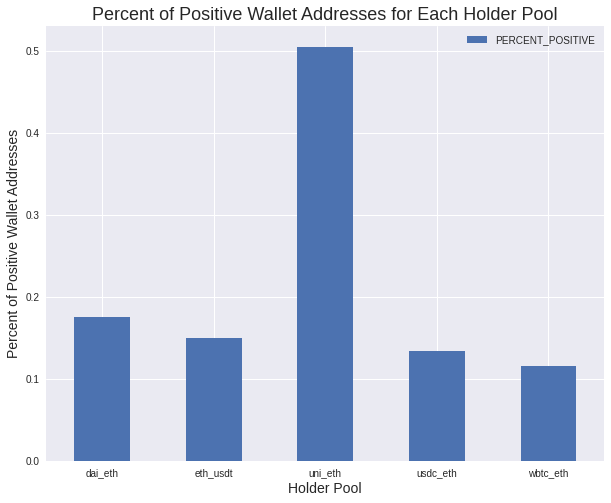

In [327]:
plt.style.use('seaborn')
ax = positiveBalancePercentages.plot(kind='bar', figsize=(10,8));
ax.set_title("Percent of Positive Wallet Addresses for Each Holder Pool", fontsize=18);
ax.set_xlabel('Holder Pool', fontsize=14);
plt.xticks(rotation=360);
ax.set_ylabel('Percent of Positive Wallet Addresses', fontsize=14);
ax.set_xticklabels(positiveBalancePercentages['labels']);

<h2>For all the swaps in our sample, compute the percentage of swaps for each unique token pair and plot these percentages.</h2>

<b>5 points</b>

In [328]:
swapPercentages = (swaps.groupby(['token_pairs', 'EVENT_TYPE']).size() / swaps.shape[0]).unstack()
swapPercentages

EVENT_TYPE,SWAP
token_pairs,
DAI_WETH,0.178260
UNI_WETH,0.131323
USDC_WETH,0.273426
WBTC_WETH,0.030405
WETH_USDT,0.386586


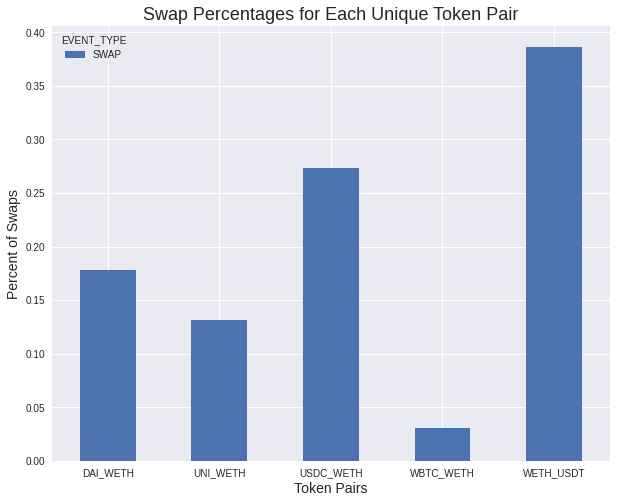

In [329]:
plt.style.use('seaborn')
swapPercentages.plot(kind='bar', figsize=(10,8));
plt.title("Swap Percentages for Each Unique Token Pair", fontsize=18);
plt.xlabel('Token Pairs', fontsize=14);
plt.xticks(rotation=360);
plt.ylabel('Percent of Swaps', fontsize=14);

Just for fun, this second part calculates the percentage of swaps for each address pair (a bit of an extra/added combinatorics excersize)

In [330]:
swaps.loc[:,'token_pairs'].unique()

array(['USDC_WETH', 'DAI_WETH', 'WBTC_WETH', 'WETH_USDT', 'UNI_WETH'],
      dtype=object)

In [331]:
# note that there are 5x2 = 10 different pairs
firstToken = list(swaps.loc[:,'TOKEN_0'].unique())
length = len(firstToken)
x = 0
for i in range(length):
  firstToken.append(firstToken[x])
  x += 1

secondToken = []
for i in range(5):
  secondToken.append(list(swaps.loc[:,'TOKEN_1'].unique())[0])
for i in range(5):
  secondToken.append(list(swaps.loc[:,'TOKEN_1'].unique())[1])

In [332]:
tokenPairs = pd.DataFrame({"firstToken": firstToken, "secondToken": secondToken})
tokenPairs["PERCENT_OF_TOTAL"] = ""

In [333]:
for i in range(len(tokenPairs)):
  numerator = len(swaps[(swaps["TOKEN_0"] == tokenPairs.iloc[i,0]) & (swaps["TOKEN_1"] == tokenPairs.iloc[i,1])])
  numerator += len(swaps[(swaps["TOKEN_1"] == tokenPairs.iloc[i,0]) & (swaps["TOKEN_0"] == tokenPairs.iloc[i,1])])
  tokenPairs.iloc[i, 2] = float(numerator/len(swaps))

In [335]:
# sanity check
tokenPairs['PERCENT_OF_TOTAL'].sum()

1.0

In [337]:
tokenPairs

,firstToken,secondToken,PERCENT_OF_TOTAL
0,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.273426
1,0x6b175474e89094c44da98b954eedeac495271d0f,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.17826
2,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.0304051
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0
4,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.131323
5,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xdac17f958d2ee523a2206206994597c13d831ec7,0
6,0x6b175474e89094c44da98b954eedeac495271d0f,0xdac17f958d2ee523a2206206994597c13d831ec7,0
7,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0xdac17f958d2ee523a2206206994597c13d831ec7,0
8,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdac17f958d2ee523a2206206994597c13d831ec7,0.386586
9,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,0xdac17f958d2ee523a2206206994597c13d831ec7,0


<h2>For all the liquidity actions (burning and minting) in our sample, compute the percentage of burning and minting done for each token pair. Plot these percentages. Can you plot the percentages for both burns and mints on the same graph?</h2>

<b>5 points</b>

Here I used the groupby method to get and unstack a dataframe of BURNS and MINTS for each token pair, then divided by the total number in each respective column.

In [338]:
liquidityActions = burn_mint.groupby(['token_pairs', 'EVENT_TYPE']).size().unstack()\
/ burn_mint.groupby(['token_pairs', 'EVENT_TYPE']).size().unstack().sum()
liquidityActions

EVENT_TYPE,BURN,MINT
token_pairs,,
DAI_WETH,0.248140,0.271002
UNI_WETH,0.133148,0.148703
USDC_WETH,0.205557,0.180979
WBTC_WETH,0.109890,0.135732
WETH_USDT,0.303265,0.263584


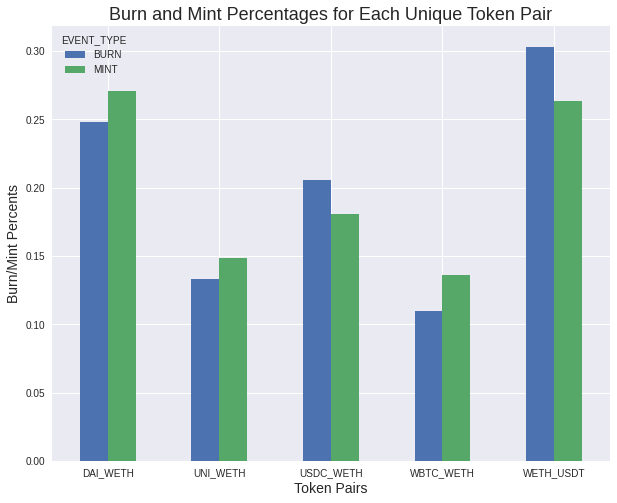

In [339]:
plt.style.use('seaborn')
liquidityActions.plot(kind='bar', figsize=(10,8));
plt.title("Burn and Mint Percentages for Each Unique Token Pair", fontsize=18);
plt.xlabel('Token Pairs', fontsize=14);
plt.xticks(rotation = 360);
plt.ylabel('Burn/Mint Percents', fontsize=14);

Just for fun, I went the "long way" to calculate the percent of burns vs. mints

In [341]:
tokenPairs["PERCENT_BURN"] = ""
tokenPairs["PERCENT_MINT"] = ""
burnOrMint = ["BURN", "MINT"]

for j in burnOrMint:
  for i in range(len(tokenPairs)):
    numerator = len(burn_mint[(burn_mint["EVENT_TYPE"] == j) & (burn_mint["TOKEN_0"] == tokenPairs.iloc[i,0]) & (burn_mint["TOKEN_1"] == tokenPairs.iloc[i,1])])
    numerator += len(burn_mint[(burn_mint["EVENT_TYPE"] == j) & (burn_mint["TOKEN_1"] == tokenPairs.iloc[i,0]) & (burn_mint["TOKEN_0"] == tokenPairs.iloc[i,1])])
    length = len(burn_mint[(burn_mint["TOKEN_0"] == tokenPairs.iloc[i,0]) & (burn_mint["TOKEN_1"] == tokenPairs.iloc[i,1])]) + \
    len(burn_mint[(burn_mint["TOKEN_1"] == tokenPairs.iloc[i,0]) & (burn_mint["TOKEN_0"] == tokenPairs.iloc[i,1])])
    if length != 0:
      tokenPairs.iloc[i, 3+burnOrMint.index(j)] = float(numerator/length)
    else:
      tokenPairs.iloc[i, 3+burnOrMint.index(j)] = 0

In [342]:
len(burn_mint[burn_mint['EVENT_TYPE'] == 'BURN'])/len(burn_mint)

0.32521865385280185

In [343]:
len(burn_mint[burn_mint['EVENT_TYPE'] == 'MINT'])/len(burn_mint)

0.6747813461471981

<h2>Plot a time series of liquidity actions (burns and mints) and swaps on the same graph. Be sure to label everything clearly. On another graph, plot the log of all the liquidity actions and swaps.</h2>

<b>5 points</b>

Here I also used the groupby function again (extremely powerful) and plotted the total number of burns, mint, and swaps for each day on a time series graph.

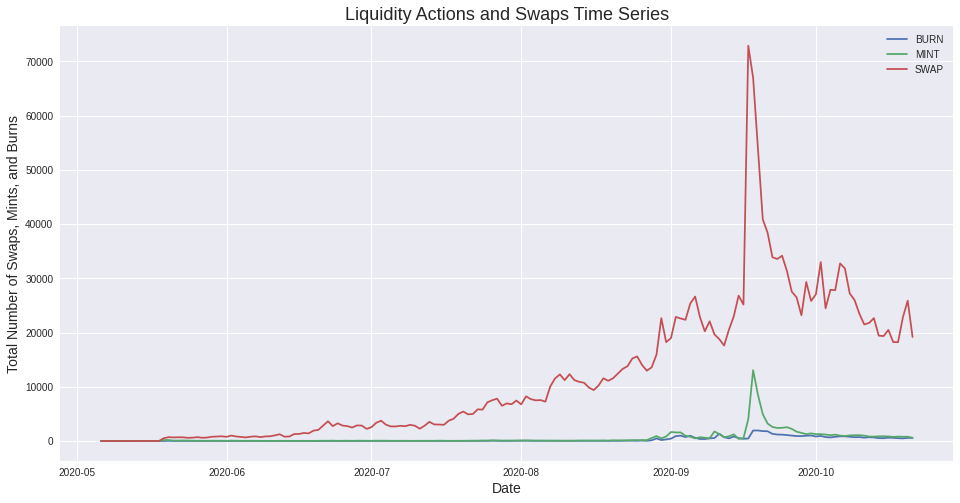

In [344]:
burn_mint.loc[:,'BLOCK_SIGNED_AT_DAY'] = pd.to_datetime(burn_mint.loc[:, 'BLOCK_SIGNED_AT']).dt.date
swaps.loc[:,'BLOCK_SIGNED_AT_DAY'] = pd.to_datetime(swaps.loc[:, 'BLOCK_SIGNED_AT']).dt.date
burn_mint.groupby(['BLOCK_SIGNED_AT_DAY', 'EVENT_TYPE']).size().unstack().fillna(0).plot(figsize=(16,8))
plt.plot(swaps.groupby(['BLOCK_SIGNED_AT_DAY', 'EVENT_TYPE']).size().unstack().fillna(0))
plt.legend(['BURN', 'MINT', 'SWAP'])
plt.title("Liquidity Actions and Swaps Time Series", fontsize=18);
plt.xlabel('Date', fontsize=14);
plt.ylabel('Total Number of Swaps, Mints, and Burns', fontsize=14);

Here I created new columns for the log of the total number of burns, mints, and swaps. 

In [345]:
df = burn_mint.groupby(['BLOCK_SIGNED_AT_DAY', 'EVENT_TYPE']).size().unstack()
df['BURN'] = np.log(df['BURN'])
df['MINT'] = np.log(df['MINT'])
df2 = swaps.groupby(['BLOCK_SIGNED_AT_DAY', 'EVENT_TYPE']).size().unstack()
df2['SWAP'] = np.log(df2['SWAP'])

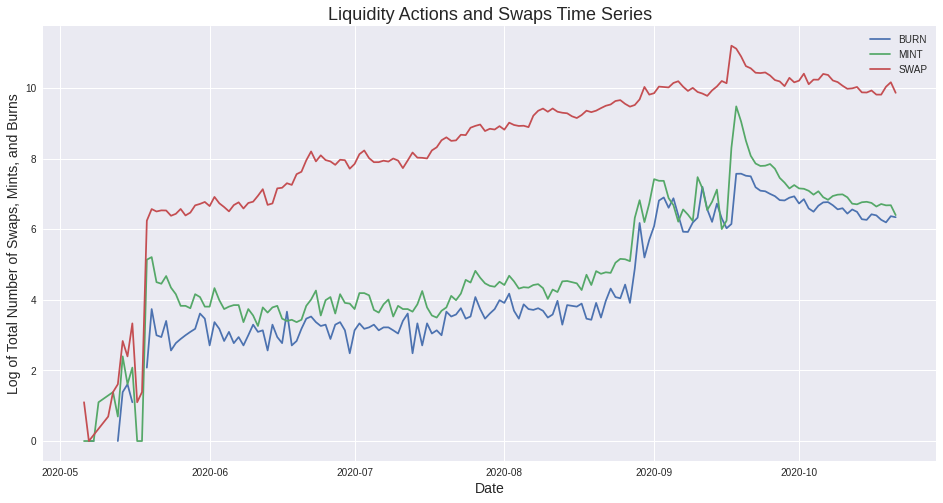

In [346]:
df.plot(figsize=(16,8))
plt.plot(df2)
plt.legend(['BURN', 'MINT', 'SWAP'])
plt.title("Liquidity Actions and Swaps Time Series", fontsize=18);
plt.xlabel('Date', fontsize=14);
plt.ylabel('Log of Total Number of Swaps, Mints, and Burns', fontsize=14);

<h2>Appropriately adjust all amounts or quantities in all seven data sets to their correct decimal form.</h2>
Recall, to do this you need to divide the amount by ten to the power of the corresponding decimal. 

<b>5 points</b>

In [394]:
burn_mint.loc[:,'LOGGED_AMOUNT0'] = burn_mint.loc[:,'LOGGED_AMOUNT0'].astype(float) / np.power(10, burn_mint.loc[:,'TOKEN_0_DECIMALS'])
burn_mint.loc[:,'LOGGED_AMOUNT1'] = burn_mint.loc[:,'LOGGED_AMOUNT1'].astype(float) / np.power(10, burn_mint.loc[:,'TOKEN_1_DECIMALS'])
swaps.loc[:, 'AMOUNT0_IN'] = swaps.loc[:,'AMOUNT0_IN'].astype(float) /  np.power(10, swaps.loc[:,'TOKEN_0_DECIMALS'])
swaps.loc[:, 'AMOUNT0_OUT'] = swaps.loc[:,'AMOUNT0_OUT'].astype(float) /  np.power(10, swaps.loc[:,'TOKEN_0_DECIMALS'])
swaps.loc[:, 'AMOUNT1_IN'] = swaps.loc[:,'AMOUNT1_IN'].astype(float) /  np.power(10, swaps.loc[:,'TOKEN_1_DECIMALS'])
swaps.loc[:, 'AMOUNT1_OUT'] = swaps.loc[:,'AMOUNT1_OUT'].astype(float) /  np.power(10, swaps.loc[:,'TOKEN_1_DECIMALS'])

In [395]:
datasets = [dai_eth, eth_usdt, uni_eth, usdc_eth, wbtc_eth]
for data in datasets:
  data.loc[:, 'BAL/TOT_SUP'] = data['BALANCE'].astype(float) / data['TOTAL_SUPPLY'].astype(float)
  data.loc[:, 'BALANCE'] = data.loc[:,'BALANCE'].astype(float) /  np.power(10, data.loc[:,'CONTRACT_DECIMALS'])
  data.loc[:, 'TOTAL_SUPPLY'] = data.loc[:,'TOTAL_SUPPLY'].astype(float) /  np.power(10, data.loc[:,'CONTRACT_DECIMALS'])

<h1>Hierarchical Indexing (MultiIndexing)</h1>

<h2>Index the liquidity action data set by event types and by block height. Make sure this new index is in ascending order.</h2>

<b>1 point</b>

In [349]:
liquidityActions_multi = burn_mint.set_index(['EVENT_TYPE', 'BLOCK_HEIGHT'])
liquidityActions_multi.sort_index(inplace=True)
liquidityActions_multi

BLOCK_SIGNED_AT  ...  BLOCK_SIGNED_AT_DAY
EVENT_TYPE BLOCK_HEIGHT                            ...                     
BURN       10020001     2020-05-07 22:47:25+00:00  ...           2020-05-07
           10022981     2020-05-08 09:43:59+00:00  ...           2020-05-08
           10053453     2020-05-13 03:18:50+00:00  ...           2020-05-13
           10060873     2020-05-14 06:48:21+00:00  ...           2020-05-14
           10064415     2020-05-14 19:58:48+00:00  ...           2020-05-14
...                                           ...  ...                  ...
MINT       11099946     2020-10-21 21:01:16+00:00  ...           2020-10-21
           11099956     2020-10-21 21:03:39+00:00  ...           2020-10-21
           11099984     2020-10-21 21:10:50+00:00  ...           2020-10-21
           11099984     2020-10-21 21:10:50+00:00  ...           2020-10-21
           11099992     2020-10-21 21:12:52+00:00  ...           2020-10-21

[144635 rows x 17 columns]

<h2>Reset the index.</h2>

<b>1 point</b>

In [387]:
liquidityActions_multi = liquidityActions_multi.reset_index()

<h1>Aggregation and Grouping</h1>

<h2>Describe the liquidity action, swaps, and one token holder data set, using the appropriate Pandas method. Be sure to convert any columns to their intended types, including object types that should be float types.</h2>
Hint: use the describe method.

<b>1 point</b>

In [352]:
burn_mint.describe()
burn_mint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144635 entries, 0 to 144634
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   BLOCK_HEIGHT           144635 non-null  int64              
 1   BLOCK_SIGNED_AT        144635 non-null  datetime64[ns, UTC]
 2   EVENT_TYPE             144635 non-null  object             
 3   LOGGED_AMOUNT0         144635 non-null  float64            
 4   LOGGED_AMOUNT1         144635 non-null  float64            
 5   POOL_ADDRESS           144635 non-null  object             
 6   POOL_DECIMALS          144635 non-null  int64              
 7   POOL_NAME              144635 non-null  object             
 8   TOKEN_0                144635 non-null  object             
 9   TOKEN_0_DECIMALS       144635 non-null  int64              
 10  TOKEN_0_NAME           144635 non-null  object             
 11  TOKEN_0_TICKER_SYMBOL  144635 non-null 

In [256]:
swaps.describe()
swap.info()

,BLOCK_HEIGHT,POOL_DECIMALS,TOKEN_0_DECIMALS,TOKEN_1_DECIMALS
count,1.967502e+06,1967502.0,1.967502e+06,1.967502e+06
mean,1.083409e+07,18.0,1.441484e+01,1.336097e+01
std,1.873560e+05,0.0,5.436954e+00,5.843611e+00
min,1.000857e+07,18.0,6.000000e+00,6.000000e+00
25%,1.074347e+07,18.0,6.000000e+00,6.000000e+00
50%,1.088029e+07,18.0,1.800000e+01,1.800000e+01
75%,1.096980e+07,18.0,1.800000e+01,1.800000e+01
max,1.110000e+07,18.0,1.800000e+01,1.800000e+01


In [353]:
uni_eth.info()
uni_eth.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9383 entries, 0 to 9382
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ADDRESS            9383 non-null   object 
 1   BALANCE            9383 non-null   float64
 2   BLOCK_HEIGHT       9383 non-null   int64  
 3   CONTRACT_ADDRESS   9383 non-null   object 
 4   CONTRACT_DECIMALS  9383 non-null   int64  
 5   CONTRACT_NAME      9383 non-null   object 
 6   LOGO_URL           9383 non-null   object 
 7   TOTAL_SUPPLY       9383 non-null   float64
 8   BAL/TOT_SUP        9383 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 659.9+ KB


In [355]:
# Here I loop through each dataset and change all of the columns to floats that
# should be floats (e.g. do not result in an error when tried, in other words strings)
dataSets = [burn_mint, swaps, dai_eth, eth_usdt, uni_eth, usdc_eth, wbtc_eth]
for data in dataSets:
  for column in data.columns:
    try:
      data[column] = data[column].astype(float)
    except:
      pass

<h2> For each day, compute the number of liquidity actions that took place, using the groupby method.</h2>

<b>1 point</b>

In [357]:
burn_mint.groupby('BLOCK_SIGNED_AT_DAY')['BLOCK_HEIGHT'].size()

BLOCK_SIGNED_AT_DAY
2020-05-06       1
2020-05-07       2
2020-05-08       2
2020-05-09       3
2020-05-12       4
              ... 
2020-10-17    1362
2020-10-18    1349
2020-10-19    1281
2020-10-20    1378
2020-10-21    1167
Name: BLOCK_HEIGHT, Length: 167, dtype: int64

<h2>For each block height, compute the number of liquidity actions that took place, using the groupby method.</h2>

<b>1 point</b>

In [358]:
burn_mint.groupby('BLOCK_HEIGHT')['BLOCK_HEIGHT'].size()

BLOCK_HEIGHT
10008555.0    1
10019769.0    1
10020001.0    1
10022914.0    1
10022981.0    1
             ..
11099972.0    1
11099978.0    1
11099984.0    3
11099989.0    1
11099992.0    1
Name: BLOCK_HEIGHT, Length: 105716, dtype: int64

<h1>Pivot Tables</h1>

<h2>For each block height and for each liquidity event type, compute the total amount of token zero. Compute this quantity in three unique ways using: pivot tables, multiindexes, and groupby.</h2>

<b>5 points</b>

In [359]:
# groupby method
burn_mint.groupby(['BLOCK_HEIGHT', 'EVENT_TYPE'])['LOGGED_AMOUNT0'].sum().unstack()

EVENT_TYPE,BURN,MINT
BLOCK_HEIGHT,,
10008555.0,NaN,1.000000
10019769.0,NaN,0.003263
10020001.0,0.003262,NaN
10022914.0,NaN,0.014190
10022981.0,0.014189,NaN
...,...,...
11099972.0,2797.756479,NaN
11099978.0,266.261097,NaN
11099984.0,63.967766,105.820619


In [360]:
# Pivot Table
burn_mint.pivot_table(index=['BLOCK_HEIGHT'], columns=['EVENT_TYPE'], values=['LOGGED_AMOUNT0'], aggfunc=np.sum)

LOGGED_AMOUNT0            
EVENT_TYPE             BURN        MINT
BLOCK_HEIGHT                           
10008555.0              NaN    1.000000
10019769.0              NaN    0.003263
10020001.0         0.003262         NaN
10022914.0              NaN    0.014190
10022981.0         0.014189         NaN
...                     ...         ...
11099972.0      2797.756479         NaN
11099978.0       266.261097         NaN
11099984.0        63.967766  105.820619
11099989.0        76.294329         NaN
11099992.0              NaN  127.546536

[105716 rows x 2 columns]

In [396]:
# multiindices
burn_mint.set_index(['BLOCK_HEIGHT', 'EVENT_TYPE'], inplace=True)
idx = pd.IndexSlice
pd.DataFrame({'BURN': burn_mint.loc[idx[:,'BURN'], 'LOGGED_AMOUNT0'].sum(level=0), \
              'MINT': burn_mint.loc[idx[:,'MINT'], 'LOGGED_AMOUNT0'].sum(level=0)}).fillna(0)

,BURN,MINT
BLOCK_HEIGHT,,
10008555,0.000000,1.000000
10019769,0.000000,0.003263
10020001,0.003262,0.000000
10022914,0.000000,0.014190
10022981,0.014189,0.000000
...,...,...
11099972,2797.756479,0.000000
11099978,266.261097,0.000000
11099984,63.967766,105.820619


<h1>Working with Time Series</h1>

<h2>For every data set, transform the time stamp to a datetime object.</h2>

<b>1 point</b>

In [367]:
burn_mint.loc[:, 'BLOCK_SIGNED_AT'] = pd.to_datetime(burn_mint.loc[:, 'BLOCK_SIGNED_AT'])
swaps.loc[:, 'BLOCK_SIGNED_AT'] = pd.to_datetime(swaps.loc[:, 'BLOCK_SIGNED_AT'])

<h2>For every dataset, add a new column which only contains the date without the time and set it to be the index.</h2>

<b>1 point</b>

In [368]:
burn_mint.loc[:,'BLOCK_SIGNED_AT_DAY'] = burn_mint.loc[:, 'BLOCK_SIGNED_AT'].dt.date
swaps.loc[:,'BLOCK_SIGNED_AT_DAY'] = swaps.loc[:, 'BLOCK_SIGNED_AT'].dt.date
burn_mint = burn_mint.set_index('BLOCK_SIGNED_AT_DAY')
swaps = swaps.set_index('BLOCK_SIGNED_AT_DAY')

<h2>For every dataset, add a new column which only contains the day of the week for a given date (ie 'Monday').</h2>

<b>1 point</b>

In [369]:
burn_mint.loc[:,'BLOCK_SIGNED_AT_WEEKDAY'] = burn_mint.loc[:, 'BLOCK_SIGNED_AT'].dt.day_name()
swaps.loc[:,'BLOCK_SIGNED_AT_WEEKDAY'] = swaps.loc[:, 'BLOCK_SIGNED_AT'].dt.day_name()

<h1>Combining Data Sets</h1>

<h2>Merge the liquidity actions data set with the swap data set by date. Decide on which type of merge makes the most sense, and justify your choice.</h2>

<b>1 point</b>

I merged using outer join because that way we won't be missing any data. For instance, we will capture days where there were no burning/minting but there was swaps. This is important because, even though we will have more null values, we will have more data to work with and analyze.

In [265]:
merged = pd.merge(burn_mint[0:100], swaps[0:100], on='BLOCK_SIGNED_AT', how='outer')
merged

,BLOCK_HEIGHT_x,BLOCK_SIGNED_AT,EVENT_TYPE_x,LOGGED_AMOUNT0,LOGGED_AMOUNT1,POOL_ADDRESS_x,POOL_DECIMALS_x,POOL_NAME_x,TOKEN_0_x,TOKEN_0_DECIMALS_x,TOKEN_0_NAME_x,TOKEN_0_TICKER_SYMBOL_x,TOKEN_1_x,TOKEN_1_DECIMALS_x,TOKEN_1_NAME_x,TOKEN_1_TICKER_SYMBOL_x,TX_HASH_x,token_pairs_x,BLOCK_SIGNED_AT_WEEKDAY_x,ADDRESS_FROM,ADDRESS_TO,AMOUNT0_IN,AMOUNT0_OUT,AMOUNT1_IN,AMOUNT1_OUT,BLOCK_HEIGHT_y,EVENT_TYPE_y,POOL_ADDRESS_y,POOL_DECIMALS_y,POOL_NAME_y,TOKEN_0_y,TOKEN_0_DECIMALS_y,TOKEN_0_NAME_y,TOKEN_0_TICKER_SYMBOL_y,TOKEN_1_y,TOKEN_1_DECIMALS_y,TOKEN_1_NAME_y,TOKEN_1_TICKER_SYMBOL_y,TX_HASH_y,token_pairs_y,BLOCK_SIGNED_AT_WEEKDAY_y
0,10020001.0,2020-05-07 22:47:25+00:00,BURN,3262,16204931358106,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x4113cf142204202124affdbf911b28fcb78ea5bd853e...,USDC_WETH,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10022981.0,2020-05-08 09:43:59+00:00,BURN,14189,70471266771562,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0xf390b8084310b213bc922244206b98558e09c1c1c78e...,USDC_WETH,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10053453.0,2020-05-13 03:18:50+00:00,BURN,781284,6538844915824964,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,781284,0,0,5756735722350928,10053453.0,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
3,10060873.0,2020-05-14 06:48:21+00:00,BURN,995309,4114337811302434,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x21047e47b1c3c92d6acb0e642773d5ca6542becf7e8e...,USDC_WETH,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10064415.0,2020-05-14 19:58:48+00:00,BURN,10196850044700735,49926098171426,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.0,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,10196850044700735,0,0,49773923525089,10064415.0,SWAP,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.0,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,NaN,2020-05-19 01:48:10+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x7201eab5f520878cff644cfb1e8e6821d4759653,0,10000000000000000000,47219766830874837,0,10091676.0,SWAP,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.0,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x04bd26a358fefec0532a74f24af60750e177d7b49014...,DAI_WETH,Tuesday
185,NaN,2020-05-1

<h1>Handling Missing Data</h1>

<h2>Create a summary data frame that detects null values for the above merge operations.</h2>

<b>1 point</b>

Here I created a boolean array to show whether or not a cell is null, which makes counting/detecting very easy.

In [375]:
nullDetection = merged.isnull()
print('Total number of null values: ' + str((nullDetection.sum()).sum()))
nullDetection.sum()

Total number of null values: 3560


BLOCK_HEIGHT_x               89
BLOCK_SIGNED_AT               0
EVENT_TYPE_x                 89
LOGGED_AMOUNT0               89
LOGGED_AMOUNT1               89
POOL_ADDRESS_x               89
POOL_DECIMALS_x              89
POOL_NAME_x                  89
TOKEN_0_x                    89
TOKEN_0_DECIMALS_x           89
TOKEN_0_NAME_x               89
TOKEN_0_TICKER_SYMBOL_x      89
TOKEN_1_x                    89
TOKEN_1_DECIMALS_x           89
TOKEN_1_NAME_x               89
TOKEN_1_TICKER_SYMBOL_x      89
TX_HASH_x                    89
token_pairs_x                89
BLOCK_SIGNED_AT_WEEKDAY_x    89
ADDRESS_FROM                 89
ADDRESS_TO                   89
AMOUNT0_IN                   89
AMOUNT0_OUT                  89
AMOUNT1_IN                   89
AMOUNT1_OUT                  89
BLOCK_HEIGHT_y               89
EVENT_TYPE_y                 89
POOL_ADDRESS_y               89
POOL_DECIMALS_y              89
POOL_NAME_y                  89
TOKEN_0_y                    89
TOKEN_0_

<h2>A merged data set can introduce missing data even if the original data sets had no missing data, depending on the merge type. Which merge types can introduce missing data? Perform the following quick and dirty methods for dealing with missing data and discuss which method you think is best.</h2>

<ul>
    <li>Drop all rows with missing data.</li>
    <li>Drop all columns with missing data.</li>
    <li>Fill all missing data cells with zero.</li>
    <li>Fill all missing data cells with the mean.</li>
    <li>Fill all missing data cells with the median.</li>
    <li>Fill all missing data cells with a forward fill.</li>
    <li>Fill all missing data cells with a backward fill.</li>
</ul>



<b>5 points</b>

In [377]:
# not that the default axis = 0 (rows)
merged.dropna()

,BLOCK_HEIGHT_x,BLOCK_SIGNED_AT,EVENT_TYPE_x,LOGGED_AMOUNT0,LOGGED_AMOUNT1,POOL_ADDRESS_x,POOL_DECIMALS_x,POOL_NAME_x,TOKEN_0_x,TOKEN_0_DECIMALS_x,TOKEN_0_NAME_x,TOKEN_0_TICKER_SYMBOL_x,TOKEN_1_x,TOKEN_1_DECIMALS_x,TOKEN_1_NAME_x,TOKEN_1_TICKER_SYMBOL_x,TX_HASH_x,token_pairs_x,BLOCK_SIGNED_AT_WEEKDAY_x,ADDRESS_FROM,ADDRESS_TO,AMOUNT0_IN,AMOUNT0_OUT,AMOUNT1_IN,AMOUNT1_OUT,BLOCK_HEIGHT_y,EVENT_TYPE_y,POOL_ADDRESS_y,POOL_DECIMALS_y,POOL_NAME_y,TOKEN_0_y,TOKEN_0_DECIMALS_y,TOKEN_0_NAME_y,TOKEN_0_TICKER_SYMBOL_y,TOKEN_1_y,TOKEN_1_DECIMALS_y,TOKEN_1_NAME_y,TOKEN_1_TICKER_SYMBOL_y,TX_HASH_y,token_pairs_y,BLOCK_SIGNED_AT_WEEKDAY_y
2,10053453.0,2020-05-13 03:18:50+00:00,BURN,781284,6538844915824964,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,781284,0,0,5756735722350928,10053453.0,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
4,10064415.0,2020-05-14 19:58:48+00:00,BURN,10196850044700735,49926098171426,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.0,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,10196850044700735,0,0,49773923525089,10064415.0,SWAP,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.0,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday
5,10064794.0,2020-05-14 21:23:37+00:00,BURN,1007781792513677031,5004484082473478,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.0,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0xff19b03b3b55191da3244c1f4a110e7ce47642ef39c2...,DAI_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,1007781792513677031,0,0,4965730183009843,10064794.0,SWAP,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.0,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0xff19b03b3b55191da3244c1f4a110e7ce47642ef39c2...,DAI_WETH,Thursday
6,10064798.0,2020-05-14 21:24:41+00:00,BURN,1097105,5132297184276266,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0xa0326284c90b7544b0552e39032415a96081029cbf2b...,USDC_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,1097105,0,0,4840109176344170,10064798.0,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0xa0326284c90b7544b0552e39032415a96081029cbf2b...,USDC_WETH,Thursday
7,10065685.0,2020-05-15 00:42:01+00:00,BURN,1741050,7286198547019695,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x231f351802686685edebf8a7b0157ae8751c0993fff6...,USDC_WETH,Friday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,1741050,0,0,6640693105927200,10065685.0,SWAP,0xb4e16

In [378]:
merged.dropna(axis='columns')

,BLOCK_SIGNED_AT
0,2020-05-07 22:47:25+00:00
1,2020-05-08 09:43:59+00:00
2,2020-05-13 03:18:50+00:00
3,2020-05-14 06:48:21+00:00
4,2020-05-14 19:58:48+00:00
...,...
184,2020-05-19 01:48:10+00:00
185,2020-05-19 01:48:22+00:00
186,2020-05-19 01:51:28+00:00
187,2020-05-19 01:52:03+00:00


In [379]:
# fill nulls with zeroes
merged.fillna(0)

,BLOCK_HEIGHT_x,BLOCK_SIGNED_AT,EVENT_TYPE_x,LOGGED_AMOUNT0,LOGGED_AMOUNT1,POOL_ADDRESS_x,POOL_DECIMALS_x,POOL_NAME_x,TOKEN_0_x,TOKEN_0_DECIMALS_x,TOKEN_0_NAME_x,TOKEN_0_TICKER_SYMBOL_x,TOKEN_1_x,TOKEN_1_DECIMALS_x,TOKEN_1_NAME_x,TOKEN_1_TICKER_SYMBOL_x,TX_HASH_x,token_pairs_x,BLOCK_SIGNED_AT_WEEKDAY_x,ADDRESS_FROM,ADDRESS_TO,AMOUNT0_IN,AMOUNT0_OUT,AMOUNT1_IN,AMOUNT1_OUT,BLOCK_HEIGHT_y,EVENT_TYPE_y,POOL_ADDRESS_y,POOL_DECIMALS_y,POOL_NAME_y,TOKEN_0_y,TOKEN_0_DECIMALS_y,TOKEN_0_NAME_y,TOKEN_0_TICKER_SYMBOL_y,TOKEN_1_y,TOKEN_1_DECIMALS_y,TOKEN_1_NAME_y,TOKEN_1_TICKER_SYMBOL_y,TX_HASH_y,token_pairs_y,BLOCK_SIGNED_AT_WEEKDAY_y
0,10020001.0,2020-05-07 22:47:25+00:00,BURN,3262,16204931358106,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x4113cf142204202124affdbf911b28fcb78ea5bd853e...,USDC_WETH,Thursday,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0,0,0
1,10022981.0,2020-05-08 09:43:59+00:00,BURN,14189,70471266771562,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0xf390b8084310b213bc922244206b98558e09c1c1c78e...,USDC_WETH,Friday,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0,0,0
2,10053453.0,2020-05-13 03:18:50+00:00,BURN,781284,6538844915824964,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,781284,0,0,5756735722350928,10053453.0,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
3,10060873.0,2020-05-14 06:48:21+00:00,BURN,995309,4114337811302434,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x21047e47b1c3c92d6acb0e642773d5ca6542becf7e8e...,USDC_WETH,Thursday,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0,0,0
4,10064415.0,2020-05-14 19:58:48+00:00,BURN,10196850044700735,49926098171426,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.0,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,10196850044700735,0,0,49773923525089,10064415.0,SWAP,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.0,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.0,2020-05-19 01:48:10+00:00,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x7201eab5f520878cff644cfb1e8e6821d4759653,0,10000000000000000000,47219766830874837,0,10091676.0,SWAP,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.0,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x04bd26a358fefec0532a74f24af60750e177d7b49014...,DAI_WETH,Tuesday
185,0.0,2020-05-19 01:48:22+00:00,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x260e069dead76baac587b5141bb606ef8b

In [381]:
# here I loop through to replace each null value in each column with the mean
# of that column (note that this is the same logic before where it will try
# to convert it to a float and if not it will do nothing)
meanReplace = merged
for column in meanReplace.columns:
  try:
    meanReplace[column] = meanReplace[column].fillna(meanReplace[column].astype(float).mean())
  except:
    pass
meanReplace

,BLOCK_HEIGHT_x,BLOCK_SIGNED_AT,EVENT_TYPE_x,LOGGED_AMOUNT0,LOGGED_AMOUNT1,POOL_ADDRESS_x,POOL_DECIMALS_x,POOL_NAME_x,TOKEN_0_x,TOKEN_0_DECIMALS_x,TOKEN_0_NAME_x,TOKEN_0_TICKER_SYMBOL_x,TOKEN_1_x,TOKEN_1_DECIMALS_x,TOKEN_1_NAME_x,TOKEN_1_TICKER_SYMBOL_x,TX_HASH_x,token_pairs_x,BLOCK_SIGNED_AT_WEEKDAY_x,ADDRESS_FROM,ADDRESS_TO,AMOUNT0_IN,AMOUNT0_OUT,AMOUNT1_IN,AMOUNT1_OUT,BLOCK_HEIGHT_y,EVENT_TYPE_y,POOL_ADDRESS_y,POOL_DECIMALS_y,POOL_NAME_y,TOKEN_0_y,TOKEN_0_DECIMALS_y,TOKEN_0_NAME_y,TOKEN_0_TICKER_SYMBOL_y,TOKEN_1_y,TOKEN_1_DECIMALS_y,TOKEN_1_NAME_y,TOKEN_1_TICKER_SYMBOL_y,TX_HASH_y,token_pairs_y,BLOCK_SIGNED_AT_WEEKDAY_y
0,10020001.00,2020-05-07 22:47:25+00:00,BURN,3262,16204931358106,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x4113cf142204202124affdbf911b28fcb78ea5bd853e...,USDC_WETH,Thursday,NaN,NaN,1.09805e+19,1.00795e+19,5.92598e+16,6.78397e+16,10070978.57,NaN,NaN,18.0,NaN,NaN,12.36,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
1,10022981.00,2020-05-08 09:43:59+00:00,BURN,14189,70471266771562,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0xf390b8084310b213bc922244206b98558e09c1c1c78e...,USDC_WETH,Friday,NaN,NaN,1.09805e+19,1.00795e+19,5.92598e+16,6.78397e+16,10070978.57,NaN,NaN,18.0,NaN,NaN,12.36,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
2,10053453.00,2020-05-13 03:18:50+00:00,BURN,781284,6538844915824964,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,781284,0,0,5756735722350928,10053453.00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
3,10060873.00,2020-05-14 06:48:21+00:00,BURN,995309,4114337811302434,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x21047e47b1c3c92d6acb0e642773d5ca6542becf7e8e...,USDC_WETH,Thursday,NaN,NaN,1.09805e+19,1.00795e+19,5.92598e+16,6.78397e+16,10070978.57,NaN,NaN,18.0,NaN,NaN,12.36,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
4,10064415.00,2020-05-14 19:58:48+00:00,BURN,10196850044700735,49926098171426,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.00,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,10196850044700735,0,0,49773923525089,10064415.00,SWAP,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.00,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,10097459.52,2020-05-19 01:48:10+00:00,NaN,3.24822e+20,4.45208e+18,NaN,18.0,NaN,NaN,12.34,NaN,NaN,NaN,17.88,NaN,NaN,NaN,NaN,NaN,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x7201eab5f520878cff644cfb1e8e6821d4759653,0,10000000000000000000,47219766830874837,0,10091676.00,SWAP,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac4952

In [380]:
# here is a quicker/easier alternative
merged.fillna(merged.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


,BLOCK_HEIGHT_x,BLOCK_SIGNED_AT,EVENT_TYPE_x,LOGGED_AMOUNT0,LOGGED_AMOUNT1,POOL_ADDRESS_x,POOL_DECIMALS_x,POOL_NAME_x,TOKEN_0_x,TOKEN_0_DECIMALS_x,TOKEN_0_NAME_x,TOKEN_0_TICKER_SYMBOL_x,TOKEN_1_x,TOKEN_1_DECIMALS_x,TOKEN_1_NAME_x,TOKEN_1_TICKER_SYMBOL_x,TX_HASH_x,token_pairs_x,BLOCK_SIGNED_AT_WEEKDAY_x,ADDRESS_FROM,ADDRESS_TO,AMOUNT0_IN,AMOUNT0_OUT,AMOUNT1_IN,AMOUNT1_OUT,BLOCK_HEIGHT_y,EVENT_TYPE_y,POOL_ADDRESS_y,POOL_DECIMALS_y,POOL_NAME_y,TOKEN_0_y,TOKEN_0_DECIMALS_y,TOKEN_0_NAME_y,TOKEN_0_TICKER_SYMBOL_y,TOKEN_1_y,TOKEN_1_DECIMALS_y,TOKEN_1_NAME_y,TOKEN_1_TICKER_SYMBOL_y,TX_HASH_y,token_pairs_y,BLOCK_SIGNED_AT_WEEKDAY_y
0,10020001.00,2020-05-07 22:47:25+00:00,BURN,3262,16204931358106,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x4113cf142204202124affdbf911b28fcb78ea5bd853e...,USDC_WETH,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,10070978.57,NaN,NaN,18.0,NaN,NaN,12.36,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
1,10022981.00,2020-05-08 09:43:59+00:00,BURN,14189,70471266771562,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0xf390b8084310b213bc922244206b98558e09c1c1c78e...,USDC_WETH,Friday,NaN,NaN,NaN,NaN,NaN,NaN,10070978.57,NaN,NaN,18.0,NaN,NaN,12.36,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
2,10053453.00,2020-05-13 03:18:50+00:00,BURN,781284,6538844915824964,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,781284,0,0,5756735722350928,10053453.00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
3,10060873.00,2020-05-14 06:48:21+00:00,BURN,995309,4114337811302434,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x21047e47b1c3c92d6acb0e642773d5ca6542becf7e8e...,USDC_WETH,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,10070978.57,NaN,NaN,18.0,NaN,NaN,12.36,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
4,10064415.00,2020-05-14 19:58:48+00:00,BURN,10196850044700735,49926098171426,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.00,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,10196850044700735,0,0,49773923525089,10064415.00,SWAP,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.00,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,10097459.52,2020-05-19 01:48:10+00:00,NaN,NaN,NaN,NaN,18.0,NaN,NaN,12.34,NaN,NaN,NaN,17.88,NaN,NaN,NaN,NaN,NaN,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x7201eab5f520878cff644cfb1e8e6821d4759653,0,10000000000000000000,47219766830874837,0,10091676.00,SWAP,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.00,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x04bd26a358fe

In [98]:
medianReplace = merged
for column in medianReplace.columns:
  try:
    medianReplace[column] = medianReplace[column].fillna(medianReplace[column].astype(float).median())
  except:
    pass
medianReplace

,BLOCK_HEIGHT_x,BLOCK_SIGNED_AT,EVENT_TYPE_x,LOGGED_AMOUNT0,LOGGED_AMOUNT1,POOL_ADDRESS_x,POOL_DECIMALS_x,POOL_NAME_x,POOL_TICKER_SYMBOL_x,TOKEN_0_x,TOKEN_0_DECIMALS_x,TOKEN_0_NAME_x,TOKEN_0_TICKER_SYMBOL_x,TOKEN_1_x,TOKEN_1_DECIMALS_x,TOKEN_1_NAME_x,TOKEN_1_TICKER_SYMBOL_x,TX_HASH_x,token_pairs_x,BLOCK_SIGNED_AT_WEEKDAY_x,ADDRESS_FROM,ADDRESS_TO,AMOUNT0_IN,AMOUNT0_OUT,AMOUNT1_IN,AMOUNT1_OUT,BLOCK_HEIGHT_y,EVENT_TYPE_y,POOL_ADDRESS_y,POOL_DECIMALS_y,POOL_NAME_y,POOL_TICKER_SYMBOL_y,TOKEN_0_y,TOKEN_0_DECIMALS_y,TOKEN_0_NAME_y,TOKEN_0_TICKER_SYMBOL_y,TOKEN_1_y,TOKEN_1_DECIMALS_y,TOKEN_1_NAME_y,TOKEN_1_TICKER_SYMBOL_y,TX_HASH_y,token_pairs_y,BLOCK_SIGNED_AT_WEEKDAY_y
0,10020001.0,2020-05-07 22:47:25+00:00,BURN,3262,16204931358106,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,UNI-V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x4113cf142204202124affdbf911b28fcb78ea5bd853e...,USDC_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,781284,0,0,5756735722350928,10053453.0,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,UNI-V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
1,10022981.0,2020-05-08 09:43:59+00:00,BURN,14189,70471266771562,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,UNI-V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0xf390b8084310b213bc922244206b98558e09c1c1c78e...,USDC_WETH,Friday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,781284,0,0,5756735722350928,10053453.0,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,UNI-V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
2,10053453.0,2020-05-13 03:18:50+00:00,BURN,781284,6538844915824964,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,UNI-V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,781284,0,0,5756735722350928,10053453.0,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,UNI-V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
3,10060873.0,2020-05-14 06:48:21+00:00,BURN,995309,4114337811302434,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,UNI-V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x21047e47b1c3c92d6acb0e642773d5ca6542becf7e8e...,USDC_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,781284,0,0,5756735722350928,10053453.0,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,UNI-V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.0,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
4,10064415.0,2020-05-14 19:58:48+00:00,BURN,10196850044700735,49926098171426,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,UNI-V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.0,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,1019

In [382]:
merged.fillna(merged.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


,BLOCK_HEIGHT_x,BLOCK_SIGNED_AT,EVENT_TYPE_x,LOGGED_AMOUNT0,LOGGED_AMOUNT1,POOL_ADDRESS_x,POOL_DECIMALS_x,POOL_NAME_x,TOKEN_0_x,TOKEN_0_DECIMALS_x,TOKEN_0_NAME_x,TOKEN_0_TICKER_SYMBOL_x,TOKEN_1_x,TOKEN_1_DECIMALS_x,TOKEN_1_NAME_x,TOKEN_1_TICKER_SYMBOL_x,TX_HASH_x,token_pairs_x,BLOCK_SIGNED_AT_WEEKDAY_x,ADDRESS_FROM,ADDRESS_TO,AMOUNT0_IN,AMOUNT0_OUT,AMOUNT1_IN,AMOUNT1_OUT,BLOCK_HEIGHT_y,EVENT_TYPE_y,POOL_ADDRESS_y,POOL_DECIMALS_y,POOL_NAME_y,TOKEN_0_y,TOKEN_0_DECIMALS_y,TOKEN_0_NAME_y,TOKEN_0_TICKER_SYMBOL_y,TOKEN_1_y,TOKEN_1_DECIMALS_y,TOKEN_1_NAME_y,TOKEN_1_TICKER_SYMBOL_y,TX_HASH_y,token_pairs_y,BLOCK_SIGNED_AT_WEEKDAY_y
0,10020001.00,2020-05-07 22:47:25+00:00,BURN,3262,16204931358106,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x4113cf142204202124affdbf911b28fcb78ea5bd853e...,USDC_WETH,Thursday,NaN,NaN,1.09805e+19,1.00795e+19,5.92598e+16,6.78397e+16,10070978.57,NaN,NaN,18.0,NaN,NaN,12.36,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
1,10022981.00,2020-05-08 09:43:59+00:00,BURN,14189,70471266771562,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0xf390b8084310b213bc922244206b98558e09c1c1c78e...,USDC_WETH,Friday,NaN,NaN,1.09805e+19,1.00795e+19,5.92598e+16,6.78397e+16,10070978.57,NaN,NaN,18.0,NaN,NaN,12.36,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
2,10053453.00,2020-05-13 03:18:50+00:00,BURN,781284,6538844915824964,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,781284,0,0,5756735722350928,10053453.00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
3,10060873.00,2020-05-14 06:48:21+00:00,BURN,995309,4114337811302434,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x21047e47b1c3c92d6acb0e642773d5ca6542becf7e8e...,USDC_WETH,Thursday,NaN,NaN,1.09805e+19,1.00795e+19,5.92598e+16,6.78397e+16,10070978.57,NaN,NaN,18.0,NaN,NaN,12.36,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
4,10064415.00,2020-05-14 19:58:48+00:00,BURN,10196850044700735,49926098171426,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.00,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,10196850044700735,0,0,49773923525089,10064415.00,SWAP,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.00,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,10097459.52,2020-05-19 01:48:10+00:00,NaN,3.24822e+20,4.45208e+18,NaN,18.0,NaN,NaN,12.34,NaN,NaN,NaN,17.88,NaN,NaN,NaN,NaN,NaN,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x7201eab5f520878cff644cfb1e8e6821d4759653,0,10000000000000000000,47219766830874837,0,10091676.00,SWAP,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac4952

In [383]:
# forward fill
forwardFill = merged
forwardFill.fillna(method='ffill', inplace=True)
forwardFill

,BLOCK_HEIGHT_x,BLOCK_SIGNED_AT,EVENT_TYPE_x,LOGGED_AMOUNT0,LOGGED_AMOUNT1,POOL_ADDRESS_x,POOL_DECIMALS_x,POOL_NAME_x,TOKEN_0_x,TOKEN_0_DECIMALS_x,TOKEN_0_NAME_x,TOKEN_0_TICKER_SYMBOL_x,TOKEN_1_x,TOKEN_1_DECIMALS_x,TOKEN_1_NAME_x,TOKEN_1_TICKER_SYMBOL_x,TX_HASH_x,token_pairs_x,BLOCK_SIGNED_AT_WEEKDAY_x,ADDRESS_FROM,ADDRESS_TO,AMOUNT0_IN,AMOUNT0_OUT,AMOUNT1_IN,AMOUNT1_OUT,BLOCK_HEIGHT_y,EVENT_TYPE_y,POOL_ADDRESS_y,POOL_DECIMALS_y,POOL_NAME_y,TOKEN_0_y,TOKEN_0_DECIMALS_y,TOKEN_0_NAME_y,TOKEN_0_TICKER_SYMBOL_y,TOKEN_1_y,TOKEN_1_DECIMALS_y,TOKEN_1_NAME_y,TOKEN_1_TICKER_SYMBOL_y,TX_HASH_y,token_pairs_y,BLOCK_SIGNED_AT_WEEKDAY_y
0,10020001.00,2020-05-07 22:47:25+00:00,BURN,3262,16204931358106,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x4113cf142204202124affdbf911b28fcb78ea5bd853e...,USDC_WETH,Thursday,NaN,NaN,1.09805e+19,1.00795e+19,5.92598e+16,6.78397e+16,10070978.57,NaN,NaN,18.0,NaN,NaN,12.36,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
1,10022981.00,2020-05-08 09:43:59+00:00,BURN,14189,70471266771562,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0xf390b8084310b213bc922244206b98558e09c1c1c78e...,USDC_WETH,Friday,NaN,NaN,1.09805e+19,1.00795e+19,5.92598e+16,6.78397e+16,10070978.57,NaN,NaN,18.0,NaN,NaN,12.36,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
2,10053453.00,2020-05-13 03:18:50+00:00,BURN,781284,6538844915824964,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,781284,0,0,5756735722350928,10053453.00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
3,10060873.00,2020-05-14 06:48:21+00:00,BURN,995309,4114337811302434,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x21047e47b1c3c92d6acb0e642773d5ca6542becf7e8e...,USDC_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,1.09805e+19,1.00795e+19,5.92598e+16,6.78397e+16,10070978.57,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,12.36,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
4,10064415.00,2020-05-14 19:58:48+00:00,BURN,10196850044700735,49926098171426,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.00,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,10196850044700735,0,0,49773923525089,10064415.00,SWAP,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.00,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,10097459.52,2020-05-19 01:48:10+00:00,BURN,3.24822e+20,4.45208e+18,0xa478c2975ab1ea89e81968

In [384]:
# back fill
backwardFill = merged
backwardFill.fillna(method='bfill', inplace=True)
backwardFill

,BLOCK_HEIGHT_x,BLOCK_SIGNED_AT,EVENT_TYPE_x,LOGGED_AMOUNT0,LOGGED_AMOUNT1,POOL_ADDRESS_x,POOL_DECIMALS_x,POOL_NAME_x,TOKEN_0_x,TOKEN_0_DECIMALS_x,TOKEN_0_NAME_x,TOKEN_0_TICKER_SYMBOL_x,TOKEN_1_x,TOKEN_1_DECIMALS_x,TOKEN_1_NAME_x,TOKEN_1_TICKER_SYMBOL_x,TX_HASH_x,token_pairs_x,BLOCK_SIGNED_AT_WEEKDAY_x,ADDRESS_FROM,ADDRESS_TO,AMOUNT0_IN,AMOUNT0_OUT,AMOUNT1_IN,AMOUNT1_OUT,BLOCK_HEIGHT_y,EVENT_TYPE_y,POOL_ADDRESS_y,POOL_DECIMALS_y,POOL_NAME_y,TOKEN_0_y,TOKEN_0_DECIMALS_y,TOKEN_0_NAME_y,TOKEN_0_TICKER_SYMBOL_y,TOKEN_1_y,TOKEN_1_DECIMALS_y,TOKEN_1_NAME_y,TOKEN_1_TICKER_SYMBOL_y,TX_HASH_y,token_pairs_y,BLOCK_SIGNED_AT_WEEKDAY_y
0,10020001.00,2020-05-07 22:47:25+00:00,BURN,3262,16204931358106,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x4113cf142204202124affdbf911b28fcb78ea5bd853e...,USDC_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,1.09805e+19,1.00795e+19,5.92598e+16,6.78397e+16,10070978.57,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,12.36,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
1,10022981.00,2020-05-08 09:43:59+00:00,BURN,14189,70471266771562,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0xf390b8084310b213bc922244206b98558e09c1c1c78e...,USDC_WETH,Friday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,1.09805e+19,1.00795e+19,5.92598e+16,6.78397e+16,10070978.57,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,12.36,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
2,10053453.00,2020-05-13 03:18:50+00:00,BURN,781284,6538844915824964,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,781284,0,0,5756735722350928,10053453.00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
3,10060873.00,2020-05-14 06:48:21+00:00,BURN,995309,4114337811302434,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.00,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x21047e47b1c3c92d6acb0e642773d5ca6542becf7e8e...,USDC_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,1.09805e+19,1.00795e+19,5.92598e+16,6.78397e+16,10070978.57,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18.0,Uniswap V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,12.36,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,USDC_WETH,Wednesday
4,10064415.00,2020-05-14 19:58:48+00:00,BURN,10196850044700735,49926098171426,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18.0,Uniswap V2,0x6b175474e89094c44da98b954eedeac495271d0f,18.00,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.00,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,DAI_WETH,Thursday,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x379b4609bdf93b3584cf7b64bc78199cf185f1cd,10196850044700735,0,0,4

<h1>Vectorized String Operations</h1>

<h2>Change the column names of all the data frames to lower case using string operations.</h2>

<b>1 point</b>

In [385]:
datasets = [burn_mint,  dai_eth, eth_usdt, uni_eth, usdc_eth, \
            wbtc_eth, swaps]
for data in datasets:
  data.columns = data.columns.str.lower()
datasets[0].columns

Index(['block_signed_at', 'logged_amount0', 'logged_amount1', 'pool_address',
       'pool_decimals', 'pool_name', 'token_0', 'token_0_decimals',
       'token_0_name', 'token_0_ticker_symbol', 'token_1', 'token_1_decimals',
       'token_1_name', 'token_1_ticker_symbol', 'tx_hash', 'token_pairs',
       'block_signed_at_weekday'],
      dtype='object')